In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
data_d = load_diabetes(as_frame=True)
X_d = data_d.data
y_progression = data_d.target

In [4]:
median_progression = y_progression.median()
y_d_binary = (y_progression > median_progression).astype(int)
# 1 High, 0 Low
y_d = pd.Series(y_d_binary)
print("Feature names:", data_d.feature_names)
print("Original Target description:", "Quantitative measure of disease progression one year after baseline.")
print(f"New Classification Target: 0 (Progression <= {median_progression:.2f}), 1 (Progression > {median_progression:.2f})")
print("Shape of X:", X_d.shape)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Original Target description: Quantitative measure of disease progression one year after baseline.
New Classification Target: 0 (Progression <= 140.50), 1 (Progression > 140.50)
Shape of X: (442, 10)


In [5]:
print("X Head")
print(X_d.head())
print("\n X Info")
print(X_d.info())
print("\n X Describe")
print(X_d.describe())

X Head
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

 X Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4

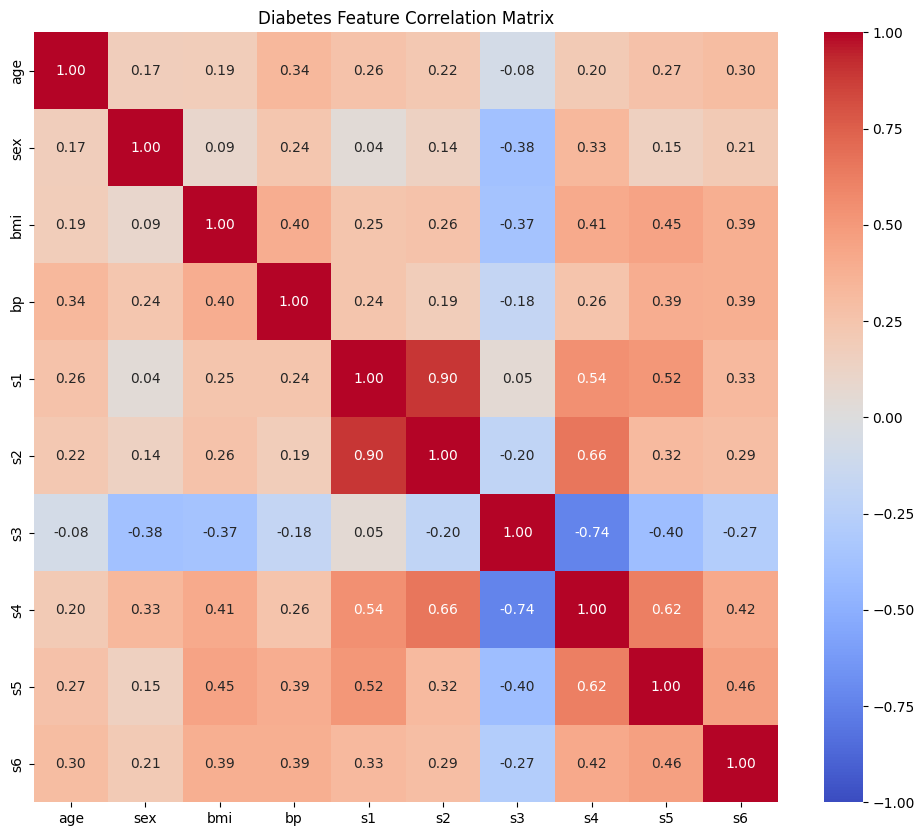

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_d.corr(), cmap='coolwarm', vmax=1.0, vmin=-1.0, annot=True, fmt=".2f")
plt.title("Diabetes Feature Correlation Matrix")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_d, y_d,
    test_size=0.2,
    random_state=42,
    stratify=y_d
)

In [8]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
print("Decision Tree Classifier")
print(classification_report(y_test, dt_clf.predict(X_test)))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        45
           1       0.62      0.75      0.68        44

    accuracy                           0.65        89
   macro avg       0.66      0.65      0.65        89
weighted avg       0.66      0.65      0.65        89



In [11]:
print("Random Forest Classifier")
print(classification_report(y_test, rf_clf.predict(X_test)))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        45
           1       0.73      0.84      0.78        44

    accuracy                           0.76        89
   macro avg       0.77      0.76      0.76        89
weighted avg       0.77      0.76      0.76        89

